## Assignment 1

**Submission deadlines:**
- get at least **2** points by lab session (week 10-14.03.2025)
- remaining points: last lab session (week 17-21.03.2025)

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$.

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters; see the [softmax function](https://en.wikipedia.org/wiki/Softmax_function) for the definition.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(np.float64(-0.05), np.float64(1.05), np.float64(-0.05), np.float64(1.05))

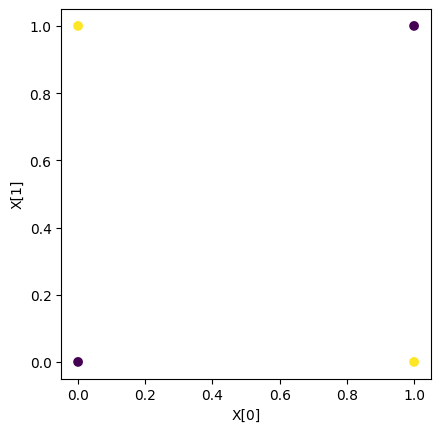

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, fun=sigmoid, dtype=torch.float64):
      self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
      self.b1 = torch.zeros((num_hidden,), dtype=dtype)
      self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
      self.b2 = torch.zeros((1,), dtype=dtype)
      self.init_params()
      self.fun = fun

    def init_params(self):
      ## randn zwraca z N(0,1) * 0.5 bo chcemy N(0, 0.5)
      self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * 0.5
      self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * 0.5
      self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * 0.5
      self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * 0.5

    def forward(self, X, Y=None, do_backward=False):

        A1 = X @ self.W1.T + self.b1
        O1 = self.fun(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = self.fun(A2)

        if Y is not None:
            loss = - (Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
          A2_grad = (O2 - Y) / X.shape[0]
          self.b2_grad = A2_grad.sum(0)
          self.W2_grad = A2_grad.T @ O1
          O1_grad = A2_grad @ self.W2
          A1_grad = O1_grad * (O1 * (1 - O1))
          self.b1_grad = A1_grad.sum(0)
          self.W1_grad = A1_grad.T @ X

        return O2, loss

In [ ]:
print(torch.zeros(2, 2).shape)

torch.Size([2, 2])


## Problem 2

In [76]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    print(grad)
    print(orig_grad)
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

A2_grad: tensor([[ 0.1390],
        [-0.1141],
        [-0.1128],
        [ 0.1342]], dtype=torch.float64)
b2_grad: tensor([0.0462], dtype=torch.float64)
W2_grad: tensor([[0.0259, 0.0251]], dtype=torch.float64)
tensor([[-3.0485e-06, -9.4149e-06],
        [-1.2126e-03, -1.3541e-03]], dtype=torch.float64)
tensor([[-3.0485e-06, -9.4149e-06],
        [-1.2126e-03, -1.3541e-03]], dtype=torch.float64)
A2_grad: tensor([[ 0.1390],
        [-0.1141],
        [-0.1128],
        [ 0.1342]], dtype=torch.float64)
b2_grad: tensor([0.0462], dtype=torch.float64)
W2_grad: tensor([[0.0259, 0.0251]], dtype=torch.float64)
tensor([-4.3542e-05, -4.3926e-03], dtype=torch.float64)
tensor([-4.3542e-05, -4.3926e-03], dtype=torch.float64)
A2_grad: tensor([[ 0.1390],
        [-0.1141],
        [-0.1128],
        [ 0.1342]], dtype=torch.float64)
b2_grad: tensor([0.0462], dtype=torch.float64)
W2_grad: tensor([[0.0259, 0.0251]], dtype=torch.float64)
tensor([[0.0259, 0.0251]], dtype=torch.float64)
tensor([[0.0259, 0.

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=torch.float64)

alpha = 0.02

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        param_grad = getattr(net, param_name + "_grad")
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * param_grad

after 0 steps 	loss=1.277372852654503
after 5000 steps 	loss=0.68987593527905
after 10000 steps 	loss=0.660762573076494
after 15000 steps 	loss=0.4579775522222391
after 20000 steps 	loss=0.15462192172832537
after 25000 steps 	loss=0.06319536250089429
after 30000 steps 	loss=0.03528248876446074
after 35000 steps 	loss=0.023308894601173278
after 40000 steps 	loss=0.016972975513760542
after 45000 steps 	loss=0.013150420555347982
after 50000 steps 	loss=0.010631841466649354
after 55000 steps 	loss=0.008864886734451563
after 60000 steps 	loss=0.007565808331775383
after 65000 steps 	loss=0.006575517498716408
after 70000 steps 	loss=0.005798590899246276
after 75000 steps 	loss=0.005174641473434721
after 80000 steps 	loss=0.0046637528990283155
after 85000 steps 	loss=0.004238570653024536
after 90000 steps 	loss=0.003879770649389368
after 95000 steps 	loss=0.0035733434124060118


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.0024836395815902895
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9965841014775305
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9964753794939702
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.004255672977524156


In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.
import random
def _3Dxor_samples(nr_samples):
  X = []
  Y = []
  def _3Dxor(sample):
    x,y,z = sample

    def XOR (a, b):
      if a != b:
          return 1
      else:
          return 0

    return XOR(XOR(x, y), z)


  for i in range(nr_samples):
    sample = [random.randint(0, 1) for j in range(3)]
    X.append(sample)
    Y.append([_3Dxor(sample)])

  return torch.tensor(X, dtype=torch.float64), torch.tensor(Y, dtype=torch.float64)


X3, Y3 = _3Dxor_samples(30)
for hidden_dim in [2, 3, 5, 10, 20]:
  net = SmallNet(3, hidden_dim, dtype=torch.float64)
  alpha = 0.05
  loss = 1
  for i in range(10000):
      _, loss = net.forward(X3, Y3, do_backward=True)
      for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          param_grad = getattr(net, param_name + "_grad")
          param[:] = param - alpha * param_grad
  print(f"hidden_dim: {hidden_dim}: {loss}")

hidden_dim: 2: 0.38686193499568033
hidden_dim: 3: 0.13658267413638747
hidden_dim: 5: 0.15911109536019835
hidden_dim: 10: 0.065565085775712
hidden_dim: 20: 0.04831685322134558


## Problem 4


In [ ]:
def relu(x):
    return torch.relu(x)

for hidden_dim in [2, 3, 5, 10, 20]:
  net = SmallNet(3, hidden_dim, dtype=torch.float64, fun= relu)
  alpha = 0.05
  loss = 1
  for i in range(10000):
      if i % 2000 == 0:
        print(f"hidden_dim: {hidden_dim}: {loss}")
      _, loss = net.forward(X3, Y3, do_backward=True)
      for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          param_grad = getattr(net, param_name + "_grad")
          param[:] = param - alpha * param_grad
  print(f"hidden_dim: {hidden_dim}: {loss}")

Streaming output truncated to the last 5000 lines.
        [-0.0078],
        [-0.0078],
        [-0.0102],
        [ 0.0008],
        [ 0.0100],
        [-0.0078],
        [-0.0102],
        [ 0.0008],
        [-0.0078],
        [ 0.0017],
        [ 0.0017],
        [ 0.0008]], dtype=torch.float64)
b2_grad: tensor([0.0022], dtype=torch.float64)
W2_grad: tensor([[ 0.0000e+00,  0.0000e+00, -6.6499e-03,  1.7326e-03, -9.3050e-05,
          1.3873e-04,  3.5727e-03, -1.8654e-03, -4.9114e-03,  2.1645e-03]],
       dtype=torch.float64)
A2_grad: tensor([[-0.0102],
        [ 0.0100],
        [ 0.0017],
        [ 0.0390],
        [ 0.0100],
        [-0.0032],
        [-0.0078],
        [ 0.0008],
        [ 0.0100],
        [ 0.0017],
        [ 0.0100],
        [ 0.0017],
        [-0.0032],
        [-0.0102],
        [ 0.0017],
        [-0.0032],
        [-0.0032],
        [-0.0078],
        [-0.0078],
        [-0.0078],
        [-0.0102],
        [ 0.0008],
        [ 0.0100],
        [-0.0078],


KeyboardInterrupt: 

## Problem 5

In [ ]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

class SmallNet2h:
    def __init__(self, in_features: int, num_hidden_1: int, num_hidden_2: int, fun=sigmoid, dtype=torch.float64):
      self.W1 = torch.zeros((num_hidden_1, in_features), dtype=dtype)
      self.b1 = torch.zeros((num_hidden_1,), dtype=dtype)
      self.W2 = torch.zeros((num_hidden_2, num_hidden_1), dtype=dtype)
      self.b2 = torch.zeros((num_hidden_2,), dtype=dtype)
      self.W3 = torch.zeros((1, num_hidden_2), dtype=dtype)
      self.b3 = torch.zeros((1,), dtype=dtype)
      self.init_params()
      self.fun = fun

    def init_params(self):
      ## randn zwraca z N(0,1) * 0.5 bo chcemy N(0, 0.5)
      self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * 0.5
      self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * 0.5
      self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * 0.5
      self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * 0.5
      self.W3 = torch.randn(self.W3.shape, dtype=self.W3.dtype) * 0.5
      self.b3 = torch.randn(self.b3.shape, dtype=self.b3.dtype) * 0.5

    def forward(self, X, Y=None, do_backward=False):

        A1 = X @ self.W1.T + self.b1
        O1 = self.fun(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = self.fun(A2)
        A3 = O2 @ self.W3.T + self.b3
        O3 = self.fun(A3)

        if Y is not None:
            loss = - (Y * torch.log(O3) + (1 - Y) * torch.log(1 - O3))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
          A3_grad = (O3 - Y) / X.shape[0]
          self.b3_grad = A3_grad.sum(0)
          self.W2_grad = A3_grad.T @ O2
          O2_grad = A3_grad @ self.W3
          A2_grad = O2_grad * (O2 * (1 - O2))
          self.b2_grad = A2_grad.sum(0)
          self.W2_grad = A2_grad.T @ O1
          O1_grad = A2_grad @ self.W2
          A1_grad = O1_grad * (O1 * (1 - O1))
          self.b1_grad = A1_grad.sum(0)
          self.W1_grad = A1_grad.T @ X

        return O2, loss


In [ ]:
for hidden_dim in [[2,2], [3, 5], [10, 20], [100, 100]]:
  net = SmallNet2h(3, hidden_dim[0], hidden_dim[1], dtype=torch.float64)
  alpha = 0.05
  loss = 1
  for i in range(10000):
      _, loss = net.forward(X3, Y3, do_backward=True)
      for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          param_grad = getattr(net, param_name + "_grad")
          param[:] = param - alpha * param_grad
  print(f"hidden_dim: {hidden_dim}: {loss}")

hidden_dim: [2, 2]: 0.680977022787827
hidden_dim: [3, 5]: 0.6200465813207207
hidden_dim: [10, 20]: 0.5166597854356405
hidden_dim: [100, 100]: 0.04981765211123947


## Problem 6

## Problem 7